# Hksimple
Illustrates the advantages of a TH1K histogram




**Author:** Victor Perevovchikov  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:54 AM.</small></i>

 A helper function is created: 

In [1]:
%%cpp -d
void padRefresh(TPad *pad,int flag=0)
{
   if (!pad) return;
   pad->Modified();
   pad->Update();
   TList *tl = pad->GetListOfPrimitives();
   if (!tl) return;
   TListIter next(tl);
   TObject *to;
   while ((to=next())) {
     if (to->InheritsFrom(TPad::Class())) padRefresh((TPad*)to,1);}
   if (flag) return;
   gSystem->ProcessEvents();
}

Create a new canvas.

In [2]:
TCanvas* c1 = new TCanvas("c1","Dynamic Filling Example",200,10,600,900);

Create a normal histogram and two th1k histograms

In [3]:
TH1 *hpx[3];
hpx[0]    = new TH1F("hp0","Normal histogram",1000,-4,4);
hpx[1]    = new TH1K("hk1","Nearest Neighbour of order 3",1000,-4,4);
hpx[2]    = new TH1K("hk2","Nearest Neighbour of order 16",1000,-4,4,16);
c1->Divide(1,3);
Int_t j;
for (j=0;j<3;j++) {
   c1->cd(j+1);
   hpx[j]->SetFillColor(48);
   hpx[j]->Draw();
}

Fill histograms randomly

In [4]:
gRandom->SetSeed(12345);
Float_t px, py, pz;
const Int_t kUPDATE = 10;
for (Int_t i = 0; i <= 300; i++) {
   gRandom->Rannor(px,py);
   for (j=0;j<3;j++) {hpx[j]->Fill(px);}
   if (i && (i%kUPDATE) == 0) {
         padRefresh(c1);
   }
}

for (j=0;j<3;j++) hpx[j]->Fit("gaus");
padRefresh(c1);

 FCN=40.1833 FROM MIGRAD    STATUS=CONVERGED     147 CALLS         148 TOTAL
                     EDM=3.42691e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.23915e+00   9.97589e-02   2.40883e-04  -1.98952e-04
   2  Mean         1.90114e-02   6.28226e-01   1.93515e-03   2.94208e-05
   3  Sigma        3.15609e+00   1.57989e+00   8.49821e-04  -2.68419e-04
 FCN=611.108 FROM MIGRAD    STATUS=CONVERGED     124 CALLS         125 TOTAL
                     EDM=1.50678e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.30426e-01   2.66128e-02   1.33443e-04  -1.87827e-02
   2  Mean        -2.11539e-01   1.55663e-02   1.87762e-04   3.15312e-02
   3  Sigma        1.17550e+00   

Draw all canvases 

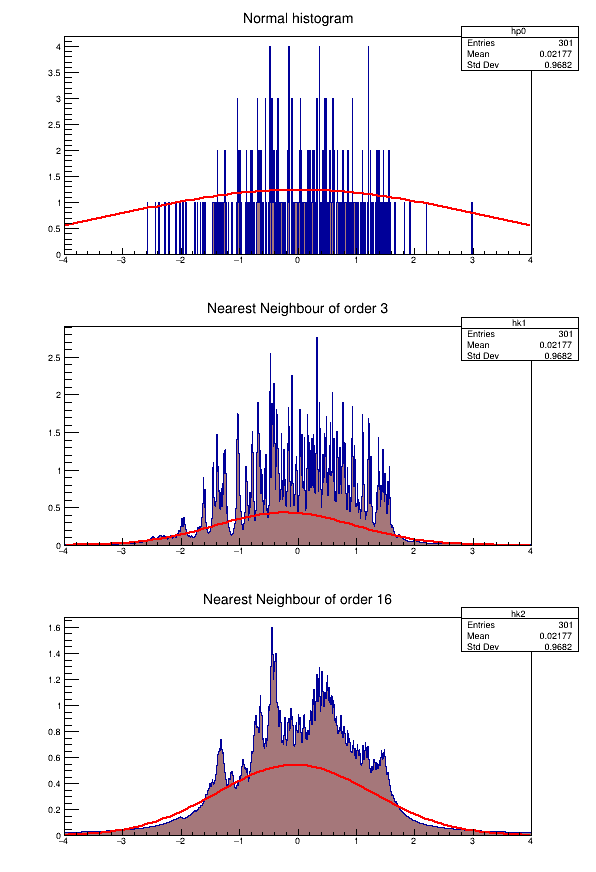

In [5]:
gROOT->GetListOfCanvases()->Draw()